# Penguins Datset



### **1. Load Dataset**

* Load the **Penguins** dataset using `seaborn`.
* Display the first 5 rows using `head()`.
* Show dataset information using `info()`.

---

### **2. Preprocess the Data**

* Check for missing values.
* Drop rows with missing values.
* Encode categorical variables (`species`, `sex`, `island`) using one-hot encoding.
* Scale numerical features (`bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, `body_mass_g`).

---

### **3. Exploratory Data Analysis (EDA)**

* Calculate and print the **average flipper length** for each **species**.
* Create a **scatterplot** of `bill_length_mm` vs `flipper_length_mm`, color-coded by `species`.
* Derive **one insight** from the EDA (e.g., "Gentoo penguins tend to have longer flippers than Adelie penguins").

---

### **4. Model Training**

* Use **K-Nearest Neighbors (KNN)** classifier to predict **species**.
* Split data into train/test sets (80/20).
* Train the model and evaluate it.
* Print:

  * Accuracy score
  * Confusion matrix

---




In [23]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler

df=sns.load_dataset("penguins")
df.describe()



,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [24]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [25]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [26]:
df.dropna(inplace=True)

In [28]:
df=pd.get_dummies(df,columns=['species','sex','island'],drop_first=True)


In [29]:
df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,sex_Male,island_Dream,island_Torgersen
0,39.1,18.7,181.0,3750.0,False,False,True,False,True
1,39.5,17.4,186.0,3800.0,False,False,False,False,True
2,40.3,18.0,195.0,3250.0,False,False,False,False,True
4,36.7,19.3,193.0,3450.0,False,False,False,False,True
5,39.3,20.6,190.0,3650.0,False,False,True,False,True


In [30]:
scaler=StandardScaler()
num_columns=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
df[num_columns]=scaler.fit_transform(df[num_columns])

df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,sex_Male,island_Dream,island_Torgersen
0,-0.896042,0.780732,-1.426752,-0.568475,False,False,True,False,True
1,-0.822788,0.119584,-1.069474,-0.506286,False,False,False,False,True
2,-0.676280,0.424729,-0.426373,-1.190361,False,False,False,False,True
4,-1.335566,1.085877,-0.569284,-0.941606,False,False,False,False,True
5,-0.859415,1.747026,-0.783651,-0.692852,False,False,True,False,True


In [32]:
df_raw = sns.load_dataset('penguins')
df_raw.dropna(inplace=True)

# Since I have encoded Iam using raw data for insights
average_flipper = df_raw.groupby('species')['flipper_length_mm'].mean()
print(average_flipper)


species
Adelie       190.102740
Chinstrap    195.823529
Gentoo       217.235294
Name: flipper_length_mm, dtype: float64


<Axes: xlabel='bill_length_mm', ylabel='flipper_length_mm'>

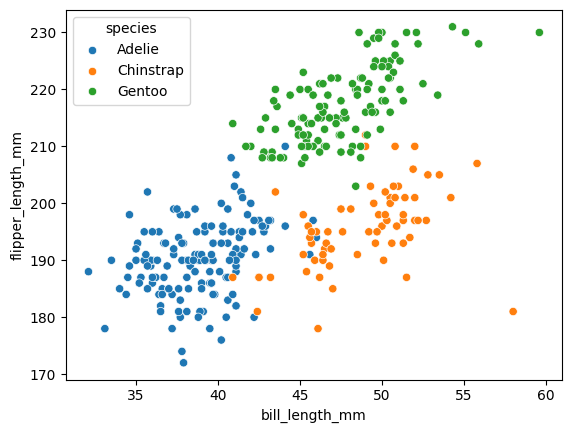

In [35]:
sns.scatterplot(data=df_raw,x='bill_length_mm',y='flipper_length_mm',hue='species')

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

X=df_raw.drop('species',axis=1)
y=df_raw['species']

X=pd.get_dummies(X,drop_first=True)

scaler=StandardScaler()
x_scaled=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=11)

model=KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
print("accuracy:",accuracy)

cm=confusion_matrix(y_test,y_pred)
print("Confusiion matrix:\n",cm)

accuracy: 0.9850746268656716
Confusiion matrix:
 [[22  1  0]
 [ 0 15  0]
 [ 0  0 29]]


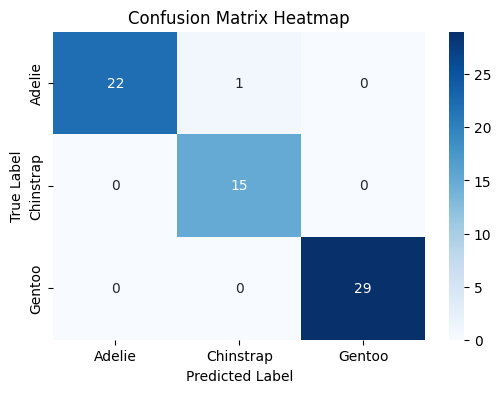

In [ ]:
#optional


import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame version of the confusion matrix for better labeling
species_labels = model.classes_   # Gets the unique class labels from the trained model (Adelie, Chinstrap, Gentoo).
cm_df = pd.DataFrame(cm, index=species_labels, columns=species_labels) # Converts the raw confusion matrix cm (which is a 2D NumPy array) into a Pandas DataFrame.

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
